In [1]:
import pandas as pd
import numpy as np
import copy
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('vitrina_final.csv', sep=';')
data.set_index('Телефон_new', inplace=True)

In [3]:
data.head()

,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,...,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
Телефон_new,,,,,,,,,,,,,,,,,,,,,
55574954-50515053535277,992,435,0.438508,217.5,545,2,3,2,1,435,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
55574954-56545048505170,4038,1262,0.312531,631.0,2636,2,18,9,1,1262,...,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0
55575349-49505555535574,7910,2891,0.365487,2891.0,7910,1,2,2,1,2891,...,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
55574854-55525053544978,1101,459,0.416894,459.0,1150,1,2,2,1,459,...,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0
55575351-51495656575170,2622,759,0.289474,759.0,2622,1,6,6,1,759,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,...,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
count,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.0,60643.000000,...,60643.000000,60643.000000,60643.000000,60643.000000,58629.000000,58629.000000,58845.0,58741.0,58741.0,60203.0
mean,4090.468018,1226.088337,0.046960,961.188031,3354.254341,1.297380,3.994905,2.889567,1.0,1226.088337,...,0.090494,0.026900,0.000095,0.007100,0.591771,0.002775,inf,inf,inf,inf
std,5678.331147,2182.216813,56.271946,1594.453064,4525.904353,0.839883,6.290636,3.633963,0.0,2182.216813,...,0.250912,0.133575,0.008377,0.073718,0.378739,0.052307,NaN,NaN,NaN,NaN
min,1.000000,-13857.000000,-13857.000000,-13857.000000,0.000000,1.000000,1.000000,1.000000,1.0,-13857.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1199.000000,196.000000,0.147518,178.000000,1178.000000,1.000000,1.000000,1.000000,1.0,196.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0
50%,2332.000000,563.000000,0.277350,482.000000,2095.000000,1.000000,2.000000,2.000000,1.0,563.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0
75%,4522.000000,1415.500000,0.395460,1167.000000,3532.000000,1.000000,4.000000,3.000000,1.0,1415.500000,...,0.002268,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
max,226917.000000,116338.000000,0.988000,65079.000000,118200.000000,40.000000,203.000000,109.000000,1.0,116338.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,inf,inf,inf


In [5]:
data = data.dropna(subset = data.columns)

## NA

In [6]:
data.isna().sum(axis=0)

Выручка_buyed                           0
Абсолютная маржа_buyed                  0
Маржа_buyed                             0
Средняя маржа_buyed                     0
Средний чек_buyed                       0
Кол-во чеков_buyed                      0
Кол-во товаров_buyed                    0
Среднее кол-во товаров в  чеке_buyed    0
Кол-во уникальных клиентов_buyed        0
Ценность клиента_buyed                  0
Количество_all                          0
Выручка_all                             0
Абсолютная маржа_all                    0
Маржа_all                               0
Средняя маржа_all                       0
Средний чек_all                         0
Кол-во чеков_all                        0
Кол-во товаров_all                      0
Среднее кол-во товаров в  чеке_all      0
Кол-во уникальных клиентов_all          0
Ценность клиента_all                    0
Количество_all.1                        0
КРУПНОГАБАРИТНЫЙ_ТОВАР                  0
ТЕКСТИЛЬ_ТРИКОТАЖ                 

In [9]:
df = copy.deepcopy(data)

## Correlation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.context('seaborn');

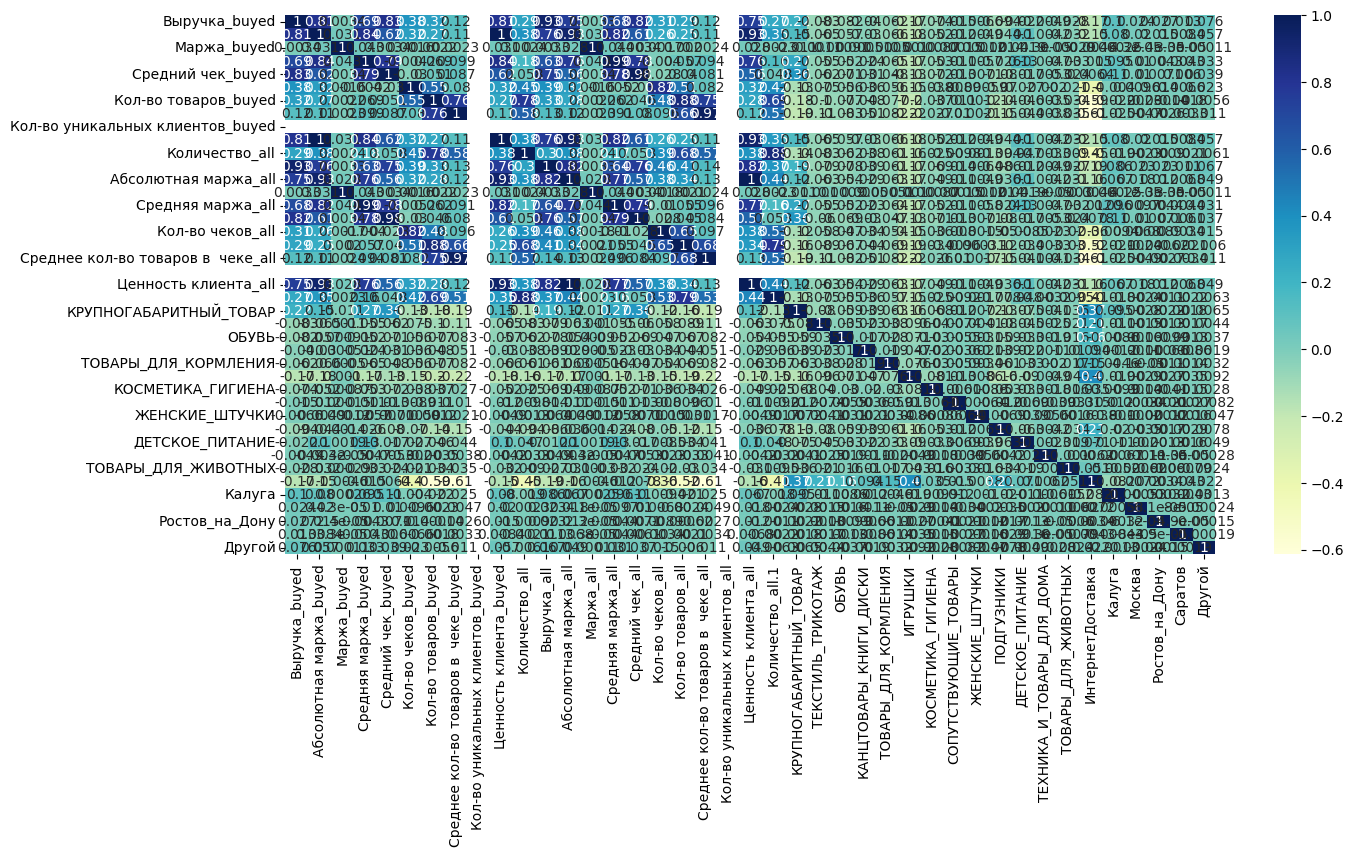

In [ ]:
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu');

In [12]:
corr = df.drop(['Кол-во уникальных клиентов_buyed', 'Кол-во уникальных клиентов_all'], axis=1).corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Ценность клиента_buyed,Количество_all,Выручка_all,Абсолютная маржа_all,Маржа_all,Средняя маржа_all,Средний чек_all,Кол-во чеков_all,Кол-во товаров_all,Среднее кол-во товаров в чеке_all,Ценность клиента_all,Количество_all.1,КРУПНОГАБАРИТНЫЙ_ТОВАР,ТЕКСТИЛЬ_ТРИКОТАЖ,ОБУВЬ,КАНЦТОВАРЫ_КНИГИ_ДИСКИ,ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ,ИГРУШКИ,КОСМЕТИКА_ГИГИЕНА,СОПУТСТВУЮЩИЕ_ТОВАРЫ,ЖЕНСКИЕ_ШТУЧКИ,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
Выручка_buyed,1.00,0.75,0.08,0.68,0.91,0.40,0.32,0.21,0.75,0.34,0.96,0.73,0.08,0.67,0.89,0.34,0.30,0.21,0.73,0.33,0.36,0.04,-0.02,0.01,0.06,-0.16,0.09,0.01,0.04,0.17,0.15,0.01,0.02,-0.32,0.06,0.02,0.01,0.01,0.04
Абсолютная маржа_buyed,0.75,1.00,0.64,0.96,0.69,0.31,0.25,0.17,1.00,0.36,0.73,0.96,0.63,0.94,0.68,0.26,0.24,0.16,0.96,0.35,0.37,0.10,0.04,0.03,0.02,-0.24,0.06,0.00,0.03,0.05,0.21,0.01,-0.02,-0.25,0.06,0.01,0.01,0.01,0.04
Маржа_buyed,0.08,0.64,1.00,0.67,0.08,0.04,0.04,0.03,0.64,0.23,0.08,0.61,0.98,0.65,0.08,0.04,0.04,0.03,0.61,0.21,0.09,0.08,0.09,0.03,-0.08,-0.19,-0.02,-0.01,0.00,-0.05,0.19,-0.00,-0.04,-0.04,0.01,0.00,0.00,-0.00,0.01
Средняя маржа_buyed,0.68,0.96,0.67,1.00,0.72,0.06,0.12,0.12,0.96,0.25,0.65,0.92,0.66,0.98,0.71,0.06,0.12,0.11,0.92,0.24,0.38,0.06,0.02,0.00,-0.03,-0.25,0.01,-0.01,0.01,0.00,0.17,-0.00,-0.04,-0.13,0.06,0.01,0.01,0.01,0.03
Средний чек_buyed,0.91,0.69,0.08,0.72,1.00,0.04,0.14,0.15,0.69,0.18,0.87,0.67,0.07,0.71,0.98,0.04,0.14,0.14,0.67,0.17,0.38,-0.01,-0.06,-0.03,0.01,-0.16,0.03,-0.01,0.01,0.10,0.09,-0.00,-0.00,-0.15,0.07,0.01,0.01,0.01,0.03
Кол-во чеков_buyed,0.40,0.31,0.04,0.06,0.04,1.00,0.52,0.22,0.31,0.50,0.40,0.31,0.04,0.06,0.04,0.83,0.50,0.22,0.31,0.48,-0.00,0.16,0.09,0.09,0.16,-0.02,0.18,0.05,0.06,0.20,0.19,0.03,0.06,-0.51,0.00,0.02,0.02,0.02,0.06
Кол-во товаров_buyed,0.32,0.25,0.04,0.12,0.14,0.52,1.00,0.94,0.25,0.92,0.33,0.26,0.04,0.12,0.14,0.48,0.95,0.92,0.26,0.89,-0.15,0.27,0.07,0.19,0.27,-0.01,0.37,0.08,0.08,0.18,0.30,0.04,0.07,-0.99,-0.03,0.01,0.01,0.01,0.02
Среднее кол-во товаров в чеке_buyed,0.21,0.17,0.03,0.12,0.15,0.22,0.94,1.00,0.17,0.86,0.22,0.18,0.03,0.11,0.15,0.24,0.89,0.98,0.18,0.82,-0.17,0.26,0.04,0.18,0.26,-0.00,0.36,0.07,0.08,0.13,0.27,0.03,0.06,-0.93,-0.04,-0.00,-0.00,-0.00,-0.01
Ценность клиента_buyed,0.75,1.00,0.64,0.96,0.69,0.31,0.25,0.17,1.00,0.36,0.73,0.96,0.63,0.94,0.68,0.26,0.24,0.16,0.96,0.35,0.37,0.10,0.04,0.03,0.02,-0.24,0.06,0.00,0.03,0.05,0.21,0.01,-0.02,-0.25,0.06,0.01,0.01,0.01,0.04
Количество_all,0.34,0.36,0.23,0.25,0.18,0.50,0.92,0.86,0.36,1.00,0.35,0.37,0.23,0.25,0.17,0.47,0.89,0.84,0.37,0.96,-0.20,0.21,0.03,0.16,0.25,-0.09,0.37,0.07,0.08,0.27,0.43,0.03,0.09,-0.91,-0.04,0.01,0.01,0.00,0.01


In [13]:
df.columns

Index(['Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Количество_all', 'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all',
       'Средняя маржа_all', 'Средний чек_all', 'Кол-во чеков_all',
       'Кол-во товаров_all', 'Среднее кол-во товаров в  чеке_all',
       'Кол-во уникальных клиентов_all', 'Ценность клиента_all',
       'Количество_all.1', 'КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ',
       'ОБУВЬ', 'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА',
       'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва',
       'Ростов_на_Дону', 'Саратов', 'Другой'],
      dtype='object')

In [14]:
df = df.drop(['Выручка_buyed', 'Выручка_all', 'Средний чек_all', 'Среднее кол-во товаров в  чеке_all'],
             axis=1)

#              'Маржа_all', 'Средняя маржа_all', 'Ценность клиента_all'
#df = df.drop(['Выручка_buyed', 'Средний чек_buyed', 'Среднее кол-во товаров в  чеке_buyed',
              #'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
              #'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all',
              #'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
              #'Ценность клиента_all'], axis=1)

In [15]:
df.shape

(58629, 37)

## Removing outliers

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [17]:
%%time
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(df.values)  # fit 3 trees  
outliers = (outliers+1)//2

print('% of outliers with Isolation forest:', 1 - (np.sum(outliers) / df.shape[0]))

% of outliers with Isolation forest: 0.017329308021627576
CPU times: user 220 ms, sys: 53.4 ms, total: 273 ms
Wall time: 274 ms


In [18]:
df = df.loc[np.array(df.index)[outliers == 1]]

In [19]:
df.shape

(57613, 37)

## Normalize data

In [20]:
from sklearn import preprocessing

In [21]:
# define scaler
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(df)

## K-MEANS

In [22]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS

In [23]:
from scipy.spatial.distance import cdist

In [24]:
%%time
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    print('{} / {}'.format(k,K[-1]))

1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9
CPU times: user 1min 56s, sys: 4min 34s, total: 6min 30s
Wall time: 40.5 s


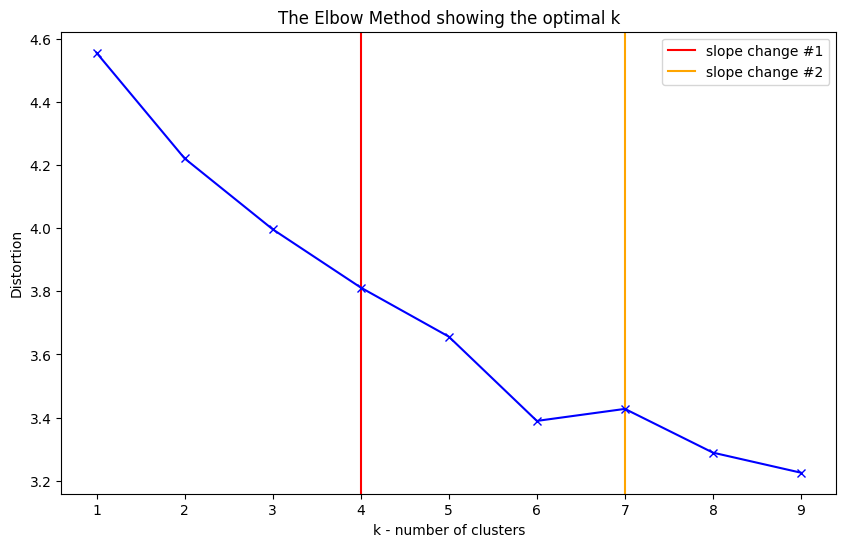

In [25]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(4, 0, 1, label='slope change #1', color='red')
plt.axvline(7, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [26]:
from sklearn.decomposition import PCA, TruncatedSVD

In [27]:
Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

In [28]:
K = 4
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X) # BEST

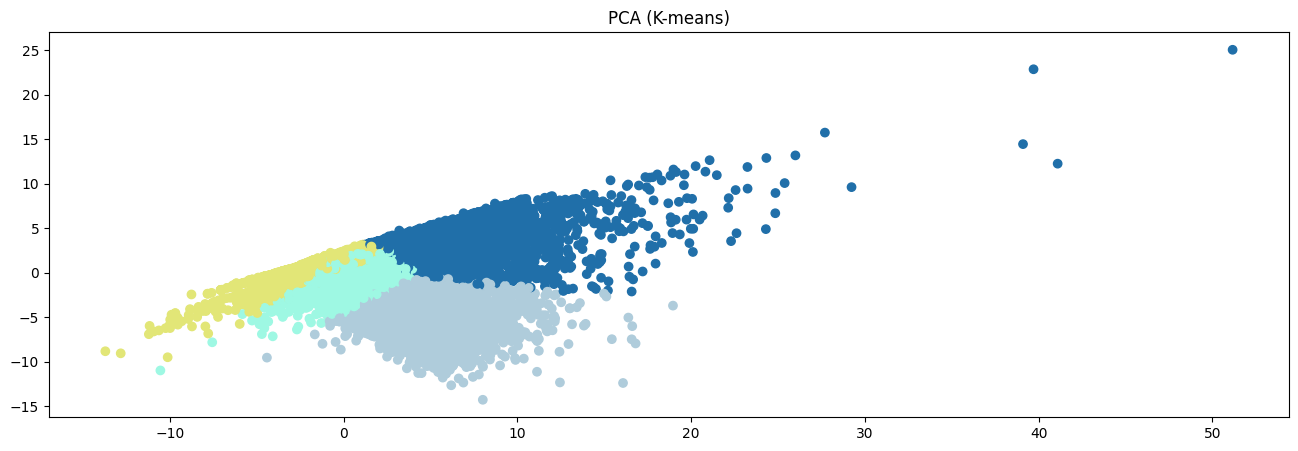

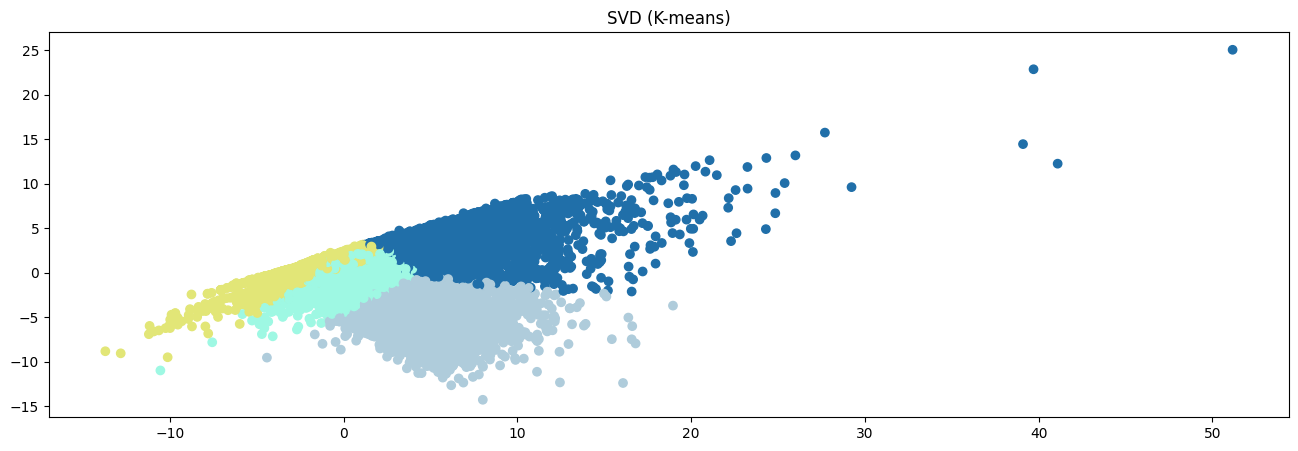

In [29]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

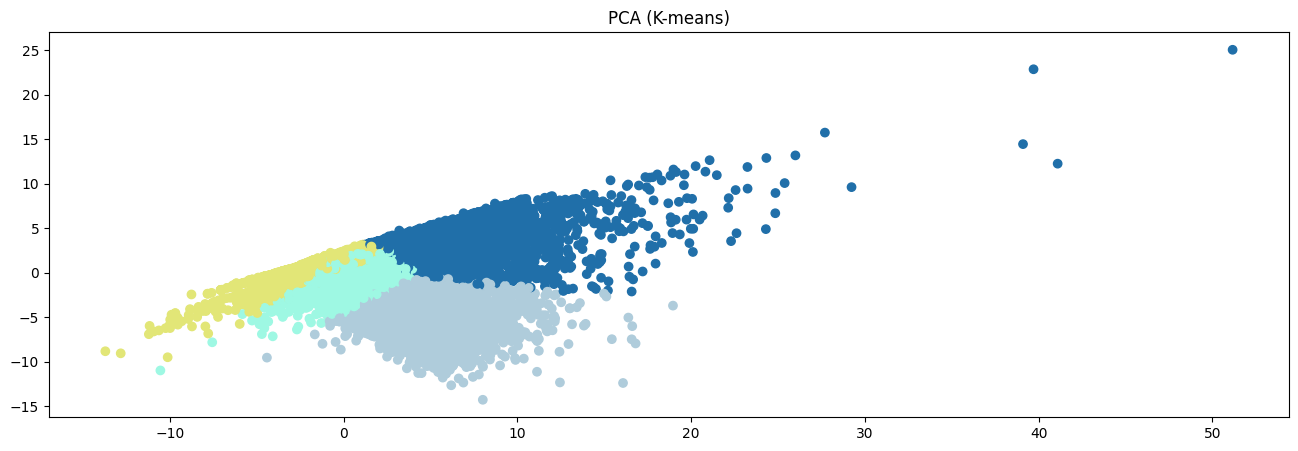

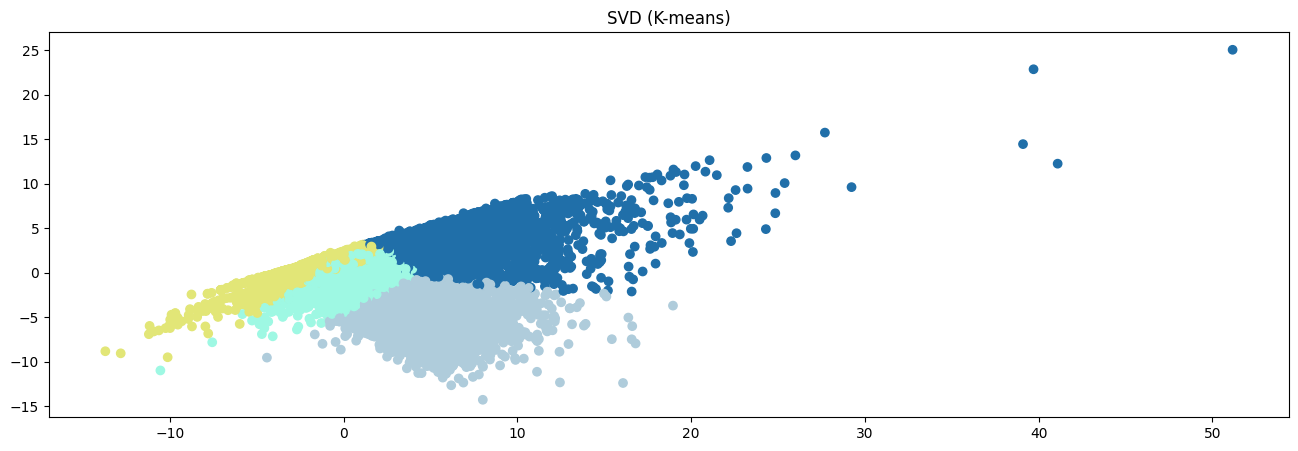

In [30]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

In [31]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
#df_5 = df[(df['Labels'] == 4)]
#df_1_4 = df[(df['Labels'] != 4)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
#print('Segment 5: ', len(df_5))
print('df: ', len(df))
#print('sum 1-4: ', (len(df_1)+len(df_2)+len(df_3)+len(df_4)))
#print('df_1_4: ', len(df_1_4))

Segment 1:  25688
Segment 2:  4520
Segment 3:  4413
Segment 4:  22992
df:  57613


In [ ]:
df_1.to_csv('df_segment_1.csv', index=False)
df_2.to_csv('df_segment_2.csv', index=False)
df_3.to_csv('df_segment_3.csv', index=False)
df_4.to_csv('df_segment_4.csv', index=False)
df_1_4.to_csv('df_segment_1_4.csv', index=False)

In [32]:
df_describe_1 = df_1.describe()
df_describe_2 = df_2.describe()
df_describe_3 = df_3.describe()
df_describe_4 = df_4.describe()

df_describe_1.to_excel('df_describe_1.xlsx')
df_describe_2.to_excel('df_describe_2.xlsx')
df_describe_3.to_excel('df_describe_3.xlsx')
df_describe_4.to_excel('df_describe_4.xlsx')

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline

In [34]:
print(f'Silhouette Score(n=4): {silhouette_score(X, labels)}')
print(f'Davies-Boulding Index (n=4): {davies_bouldin_score(X, labels)}')
print(f'Calinski-Harabasz Index (n=4): {calinski_harabasz_score(X, labels)}')

Silhouette Score(n=4): 0.13664256161019
Davies-Boulding Index (n=4): 1.9292763988154131
Calinski-Harabasz Index (n=4): 6177.23328242211


## Silhouette Score

The Silhouette Coefficient tells us how well-assigned each individual point is. If S(i) is close to 0, it is right at the inflection point between two clusters. If it is closer to -1, then we would have been better off assigning it to the other cluster. If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

In [35]:
results_sil_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})

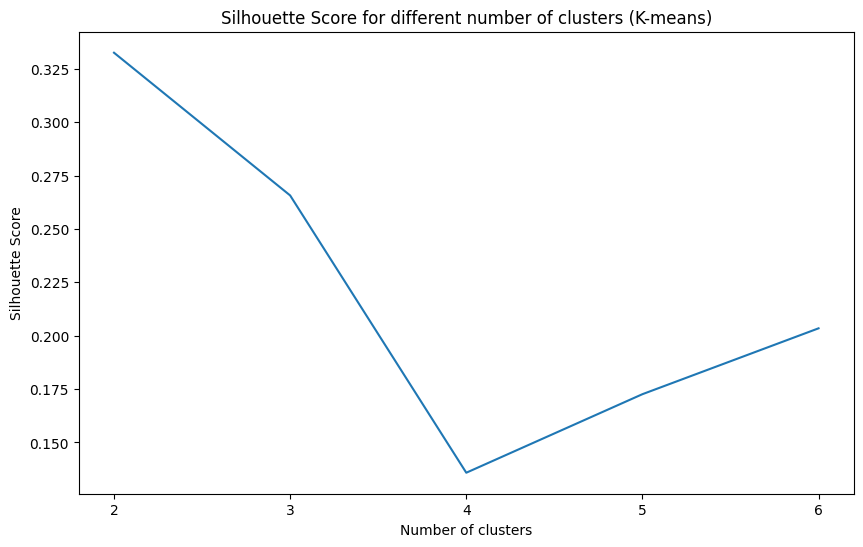

In [36]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

## Davies-Boulding Index

Davies-Boulding index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.

In [37]:
results_db_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

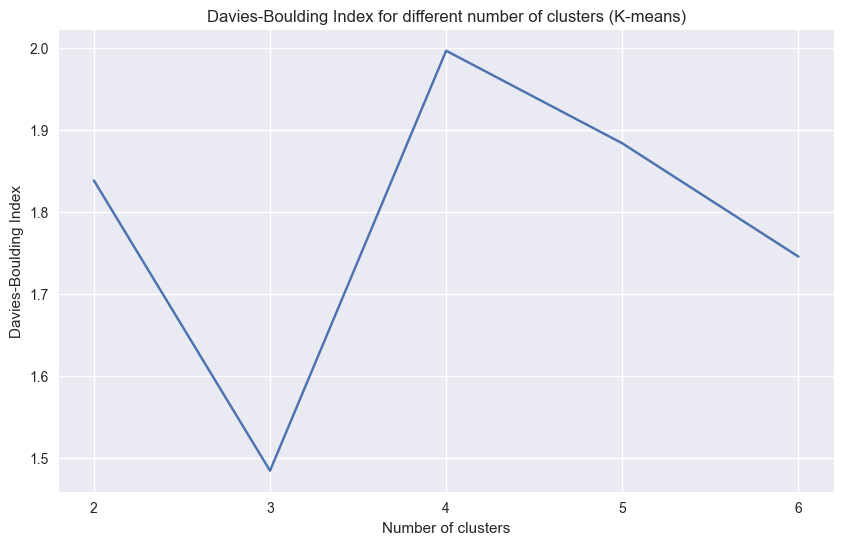

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

## Calinski-Harabasz Index

Calinski-Harabasz Index is also known as the Variance Ratio Criterion. The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The higher the Index, the better the performance.

Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others.

In [39]:
results_ch_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

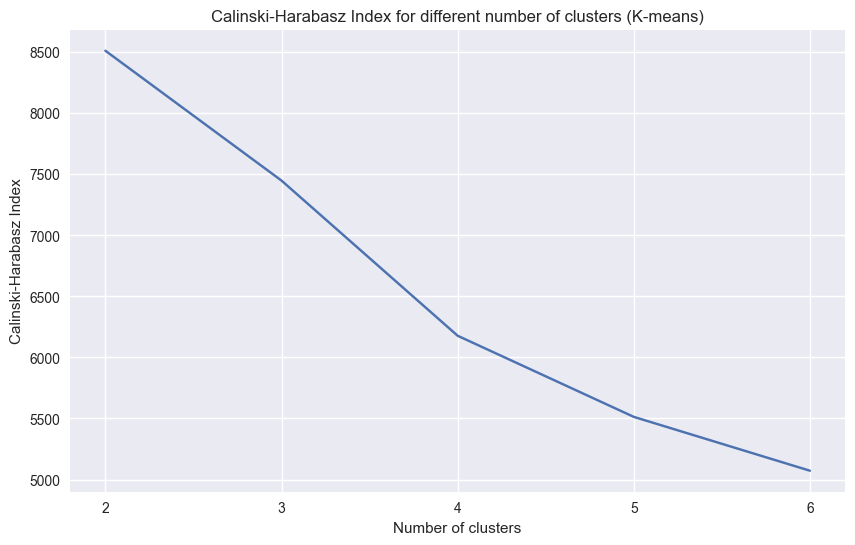

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

## Hierarchical clustering

In [41]:
import scipy.cluster.hierarchy as shc

shuffled = np.copy(X)
np.random.shuffle(shuffled)
splits = np.split(shuffled, 5) # split data, as it is too big

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(22, 10))

all_links = []
for i, s in enumerate(splits):
    links = shc.linkage(s, method='ward')
    all_links.append(links)
    if i < 3:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[0][i])
    else:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[1][i-3])
plt.tight_layout()
plt.show()

ValueError: array split does not result in an equal division

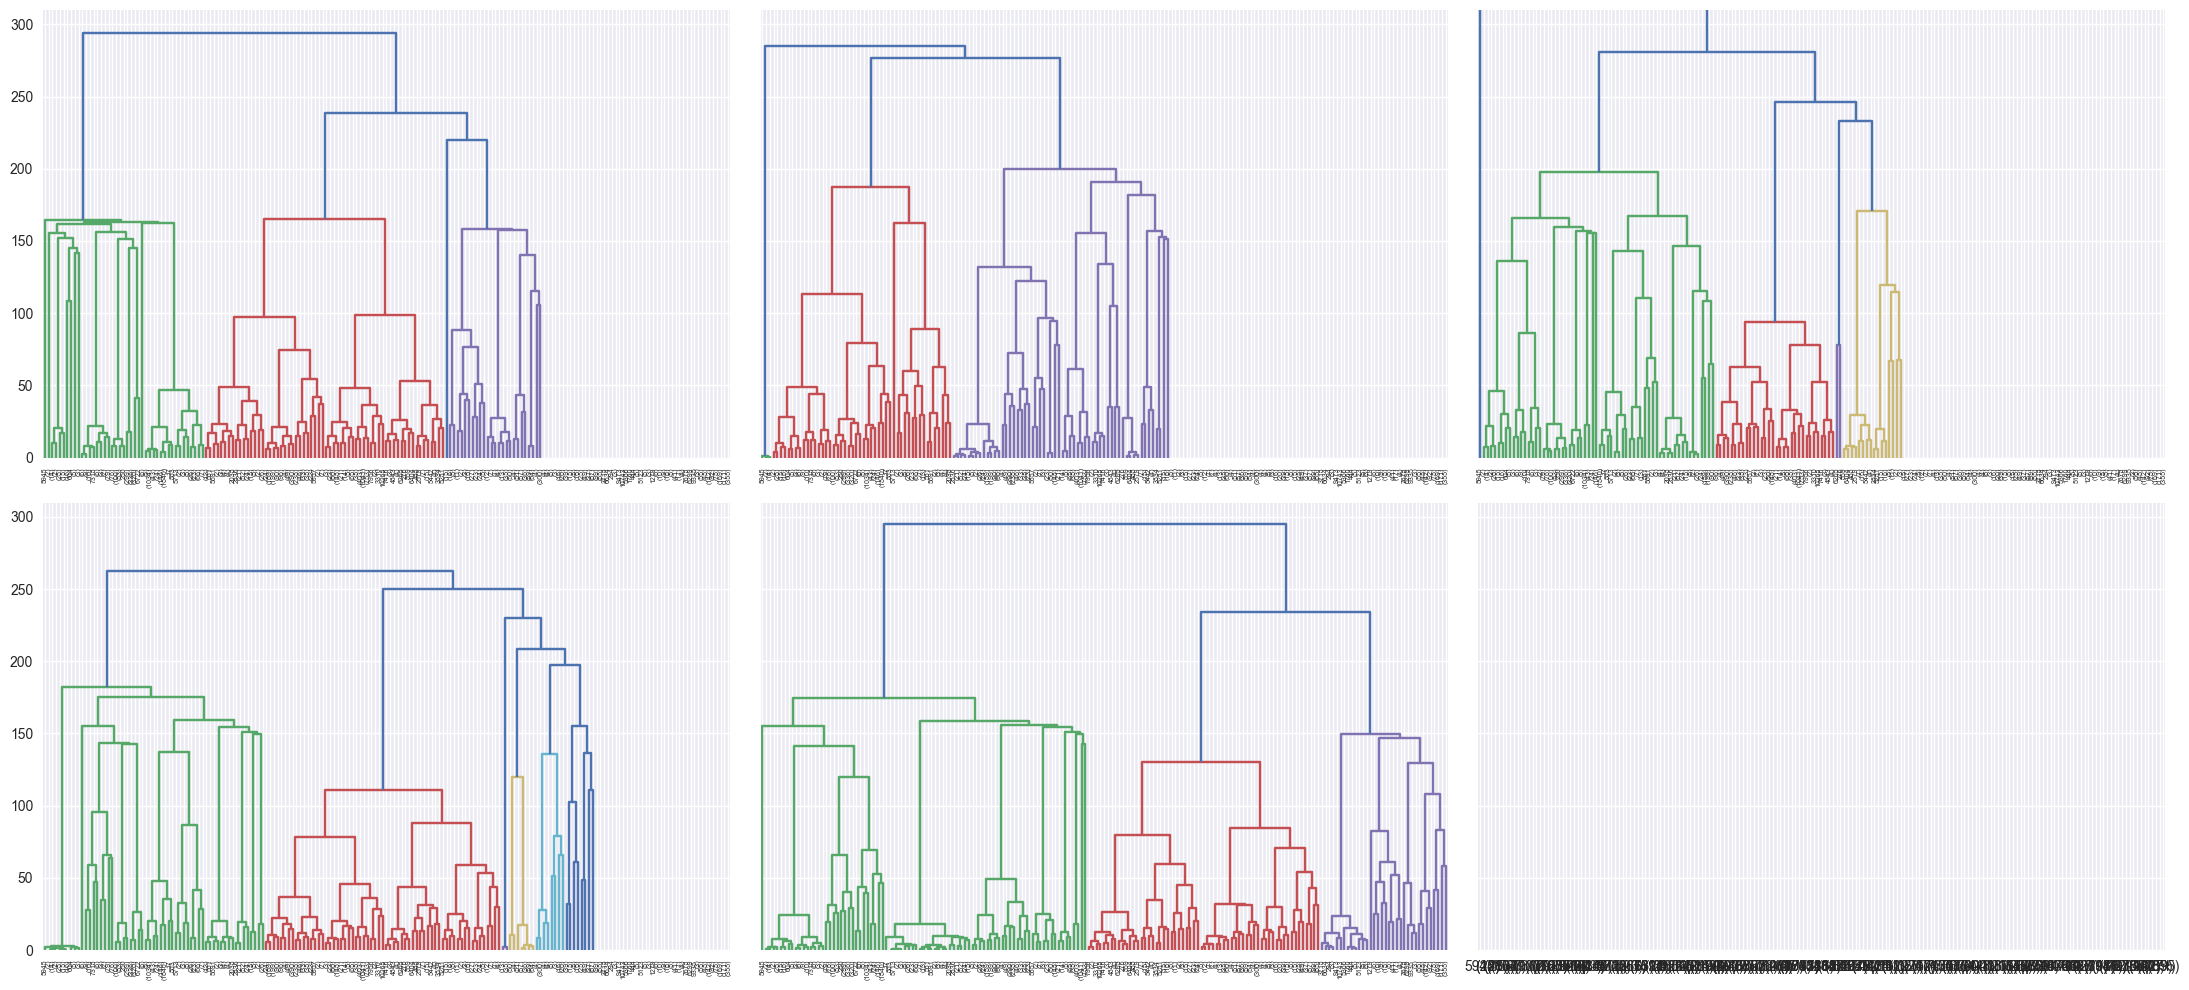

In [42]:
import scipy.cluster.hierarchy as shc

# Предположим, что X уже определен
shuffled = np.copy(X)
np.random.shuffle(shuffled)
# Измените np.split на np.array_split
splits = np.array_split(shuffled, 5)  # теперь можно разделить массив на 5 частей

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(22, 10))

all_links = []
for i, s in enumerate(splits):
    links = shc.linkage(s, method='ward')
    all_links.append(links)
    if i < 3:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[0][i])
    else:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[1][i-3])
plt.tight_layout()
plt.show()


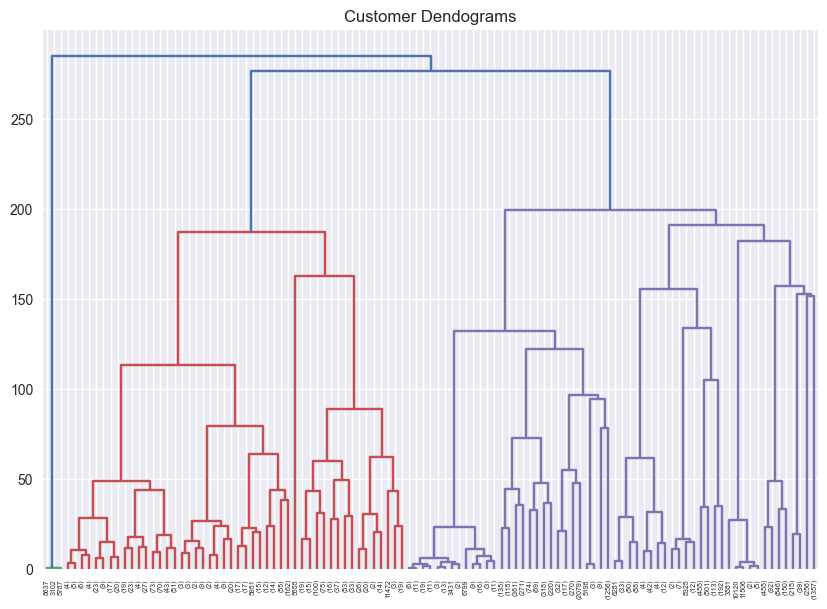

In [43]:
# show any particular graph in more detail
plot_num = 1

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(all_links[plot_num], truncate_mode='level', p=7)

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

K = 5
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

# can be analysed by splits

# sorta hierarchical
# uses partial hierarcy -> assigns rest of the data to existing clusters 

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_5 = clf.predict(X)

In [45]:
K = 4
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_4 = clf.predict(X)

In [46]:
K = 6
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_6 = clf.predict(X)

In [47]:
silhouette_score_c_4 = silhouette_score(X, clusters_4)
davies_bouldin_score_c_4 = davies_bouldin_score(X, clusters_4)
calinski_harabasz_score_c_4 = calinski_harabasz_score(X, clusters_4)

print(f'Silhouette Score(n=4): {silhouette_score_c_4}')
print(f'Davies-Boulding Index (n=4): {davies_bouldin_score_c_4}')
print(f'Calinski-Harabasz Index (n=4): {calinski_harabasz_score_c_4}')

silhouette_score_c_5 = silhouette_score(X, clusters_5)
davies_bouldin_score_c_5 = davies_bouldin_score(X, clusters_5)
calinski_harabasz_score_c_5 = calinski_harabasz_score(X, clusters_5)

print(f'Silhouette Score(n=5): {silhouette_score_c_5}')
print(f'Davies-Boulding Index (n=5): {davies_bouldin_score_c_5}')
print(f'Calinski-Harabasz Index (n=5): {calinski_harabasz_score_c_5}')

silhouette_score_c_6 = silhouette_score(X, clusters_6)
davies_bouldin_score_c_6 = davies_bouldin_score(X, clusters_6)
calinski_harabasz_score_c_6 = calinski_harabasz_score(X, clusters_6)

print(f'Silhouette Score(n=6): {silhouette_score_c_6}')
print(f'Davies-Boulding Index (n=6): {davies_bouldin_score_c_6}')
print(f'Calinski-Harabasz Index (n=6): {calinski_harabasz_score_c_6}')

Silhouette Score(n=4): 0.21861590261038175
Davies-Boulding Index (n=4): 1.2020889582851702
Calinski-Harabasz Index (n=4): 5613.027531228264
Silhouette Score(n=5): 0.11757738608021132
Davies-Boulding Index (n=5): 1.3021806272132281
Calinski-Harabasz Index (n=5): 4871.312492145156
Silhouette Score(n=6): 0.1187947095065304
Davies-Boulding Index (n=6): 1.0929233053972993
Calinski-Harabasz Index (n=6): 4471.713649221826


In [48]:
silhouette_score_c_4 = 0.21861590261038175
davies_bouldin_score_c_4 = 1.2020889582851702
calinski_harabasz_score_c_4 = 5613.027531228264

silhouette_score_c_5 = 0.11757738608021132
davies_bouldin_score_c_5 = 1.3021806272132281
calinski_harabasz_score_c_5 = 4871.312492145156

silhouette_score_c_6 = 0.1187947095065304
davies_bouldin_score_c_6 = 1.0929233053972993
calinski_harabasz_score_c_6 = 4471.713649221826

In [49]:
results_sil_hc = {4: silhouette_score_c_4,
                  5: silhouette_score_c_5,
                  6: silhouette_score_c_6}

results_db_hc =  {4: davies_bouldin_score_c_4,
                  5: davies_bouldin_score_c_5,
                  6: davies_bouldin_score_c_6}

results_ch_hc =  {4: calinski_harabasz_score_c_4,
                  5: calinski_harabasz_score_c_5,
                  6: calinski_harabasz_score_c_6}

## Silhouette Score

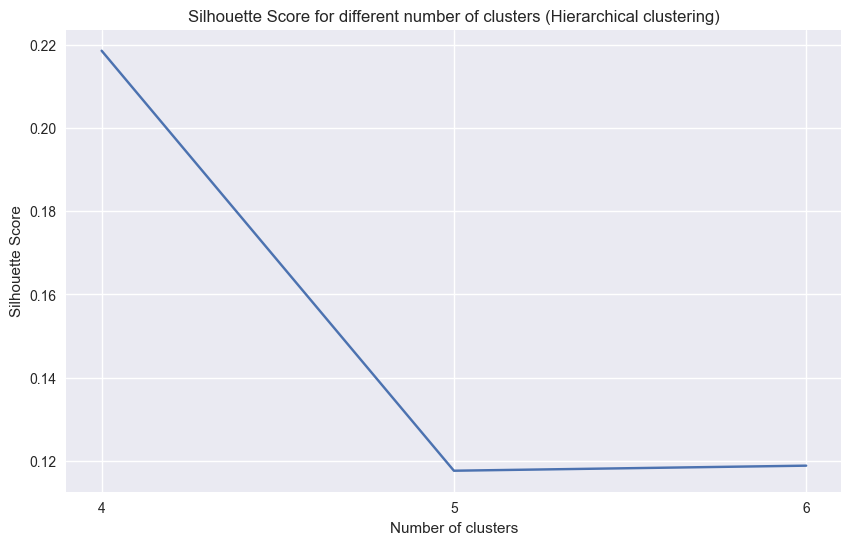

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_hc.keys()), list(results_sil_hc.values()), label = 'Silhouette Score')

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (Hierarchical clustering)')
plt.show()

## Davies-Boulding Index

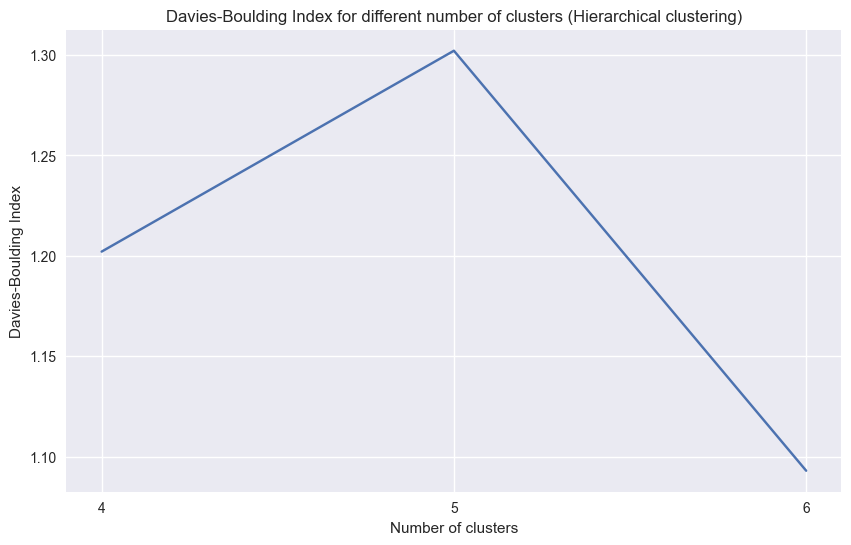

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_hc.keys()), list(results_db_hc.values()))

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (Hierarchical clustering)')
plt.show()

## Calinski-Harabasz Index

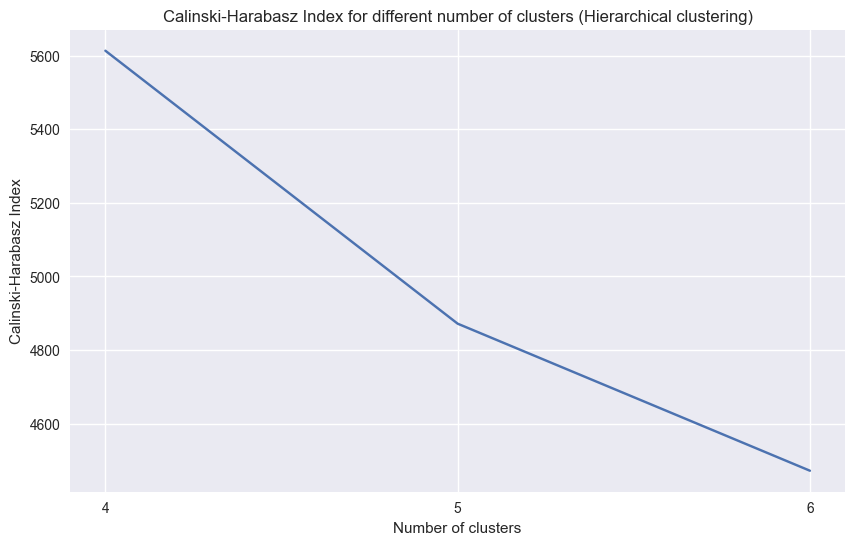

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_hc.keys()), list(results_ch_hc.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (Hierarchical clustering)')
plt.show()

## Self-Organizing Maps

In [53]:
!pip install sklearn_som

  Obtaining dependency information for sklearn_som from https://files.pythonhosted.org/packages/56/ef/5f42e874f7ea8e86b70914121e508c72cb7d301d2cb8c6f198534e6ffc24/sklearn_som-1.1.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [54]:
from sklearn_som.som import SOM

# m * n = number of clusters you expect to have 
som = SOM(m = 1, n = 5, dim = X.shape[1], random_state = 96)
som.fit(X)
clusters = som.predict(X)
clusters

array([2, 3, 4, ..., 3, 0, 4])

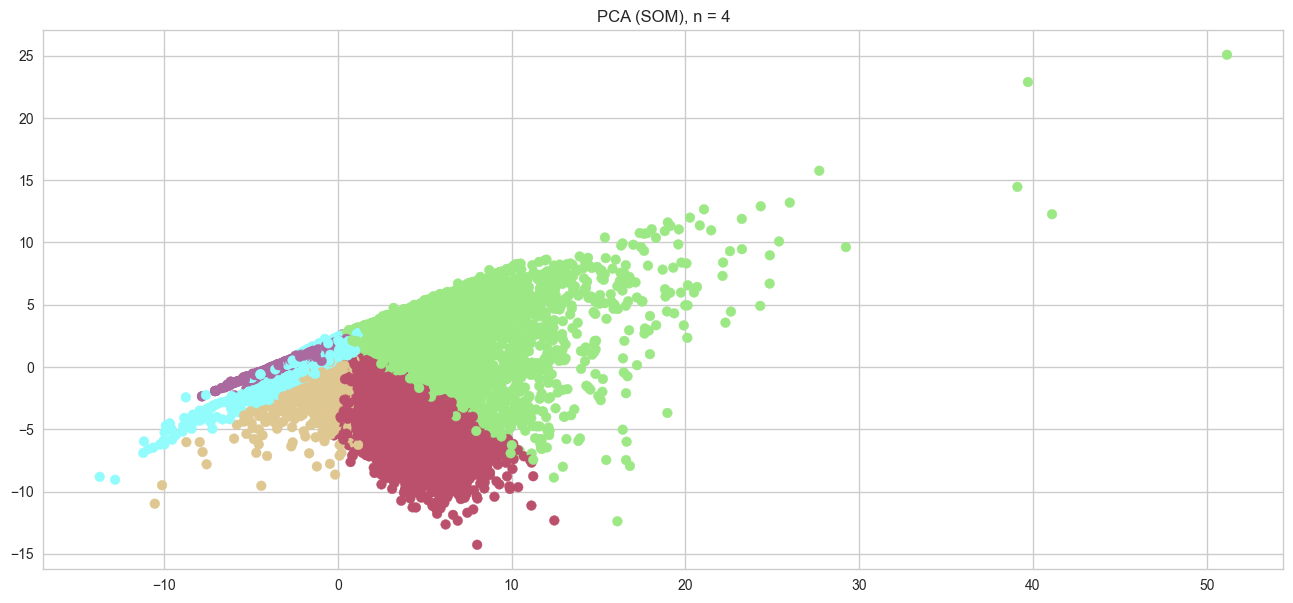

In [55]:
plt.style.use('seaborn-whitegrid')
colors = np.sqrt(np.random.randint(0, 255, size = (len(set(clusters)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(clusters))))

plt.figure(figsize = (16, 7)); plt.title('PCA (SOM), n = 4')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c = c_arr);

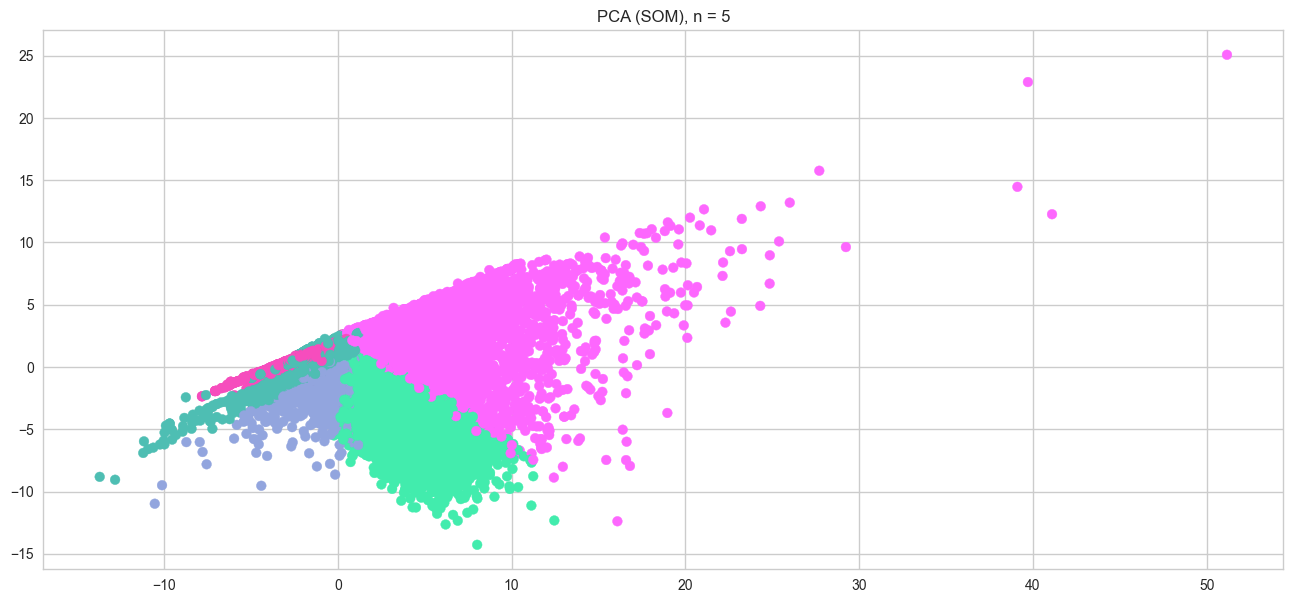

In [56]:
colors = np.sqrt(np.random.randint(0,255, size = (len(set(clusters)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(clusters))))

plt.figure(figsize = (16, 7)); plt.title('PCA (SOM), n = 5')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c = c_arr);

## Silhouette Score

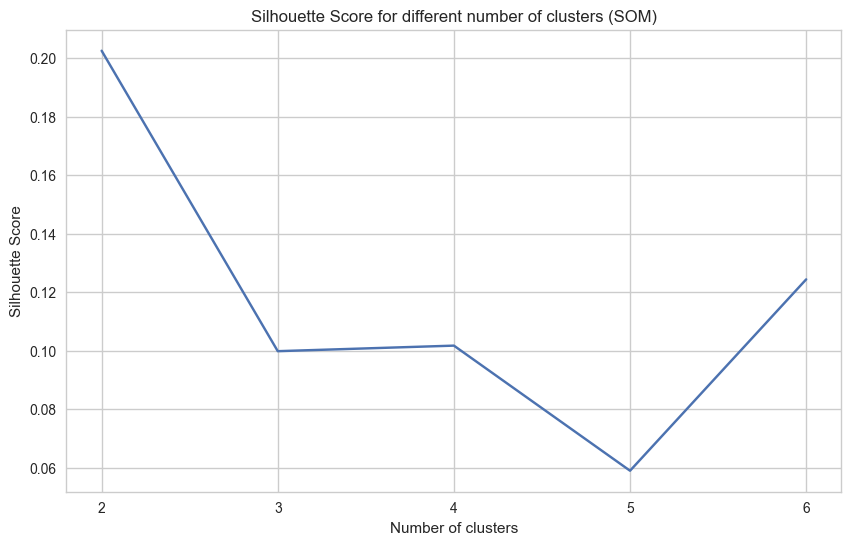

In [57]:
results_sil_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_som.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_som.keys()), list(results_sil_som.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (SOM)')
plt.show()

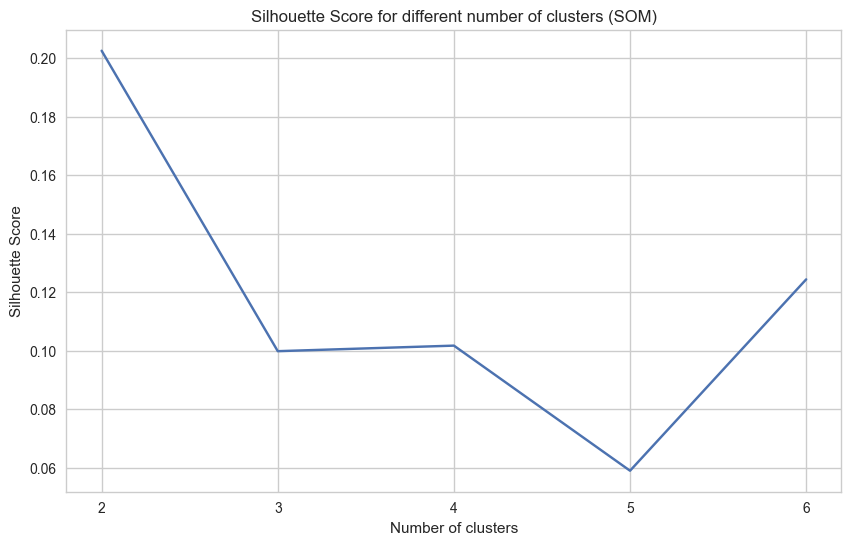

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_som.keys()), list(results_sil_som.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (SOM)')
plt.show()

## Davies-Boulding Index

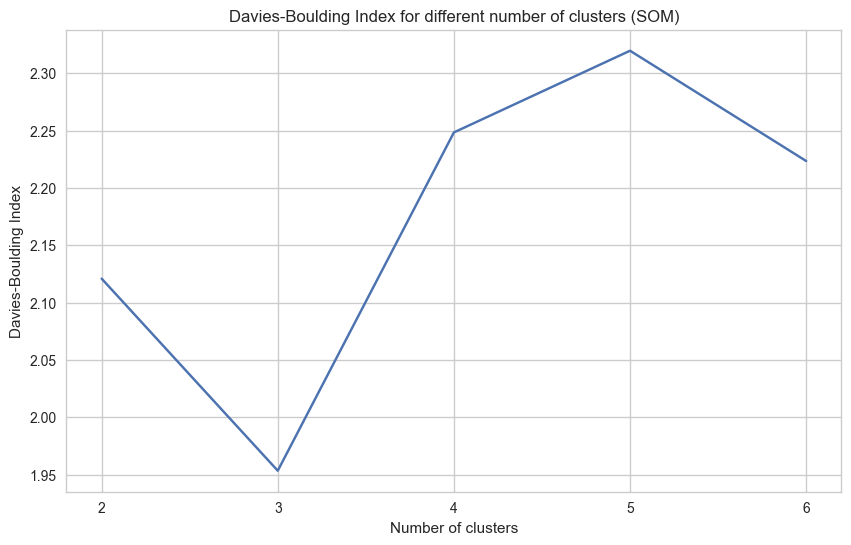

In [59]:
results_db_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_som.update({i: db_index})

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_som.keys()), list(results_db_som.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (SOM)')
plt.show()

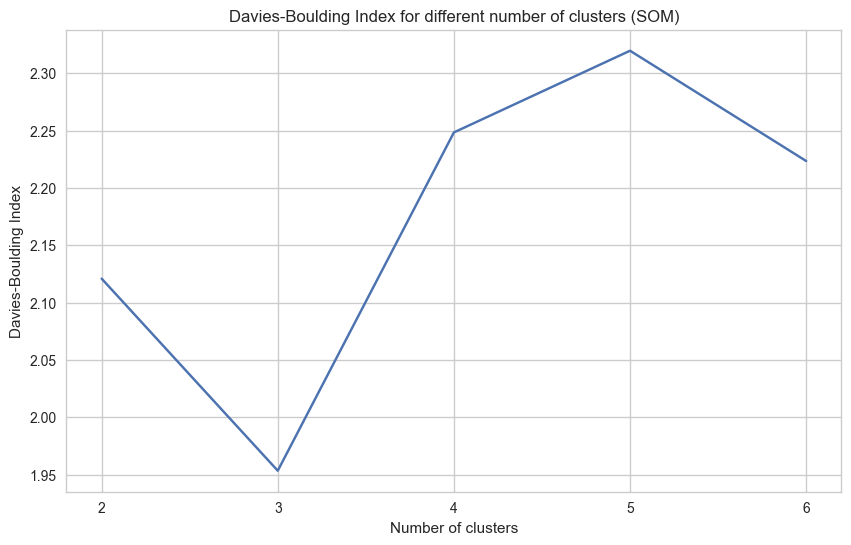

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_som.keys()), list(results_db_som.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (SOM)')
plt.show()

## Calinski-Harabasz Index

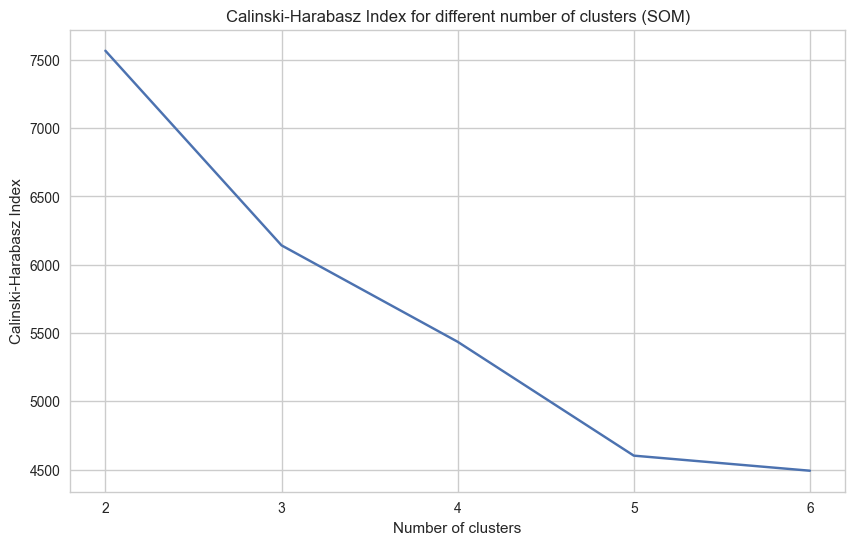

In [61]:
results_ch_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_som.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_som.keys()), list(results_ch_som.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (SOM)')
plt.show()

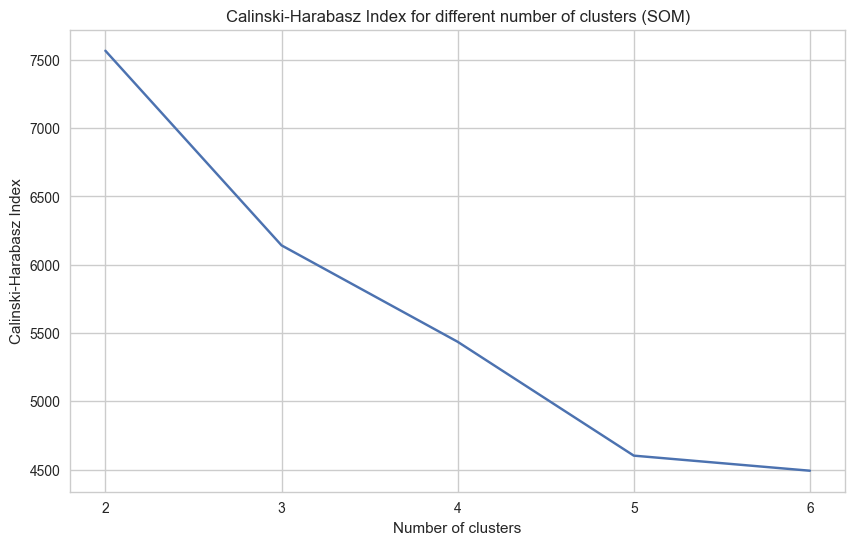

In [62]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_som.keys()), list(results_ch_som.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (SOM)')
plt.show()

## Expectation-Maximization Algorithm

In [65]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

sil_scores = []
for k in range(4, 7):
    tmp_scores = []
    for i in range(3): # EM algorithm can generate diffrent results depending on the starting point, so run 3 times to estimate score
        gm = GaussianMixture(n_components=k)
        labels = gm.fit_predict(X)
        score = metrics.silhouette_score(X, labels, metric='euclidean')
        tmp_scores.append(score)
    sil_scores.append(np.mean(tmp_scores))
print(sil_scores)

[0.12151732730577973, 0.07387762767274461, 0.08150228214728862]


In [66]:
# Highest sil score indicates the best choice for number of components (i.e. number of clusters)
gm = GaussianMixture(n_components=5)
labels = gm.fit_predict(X)

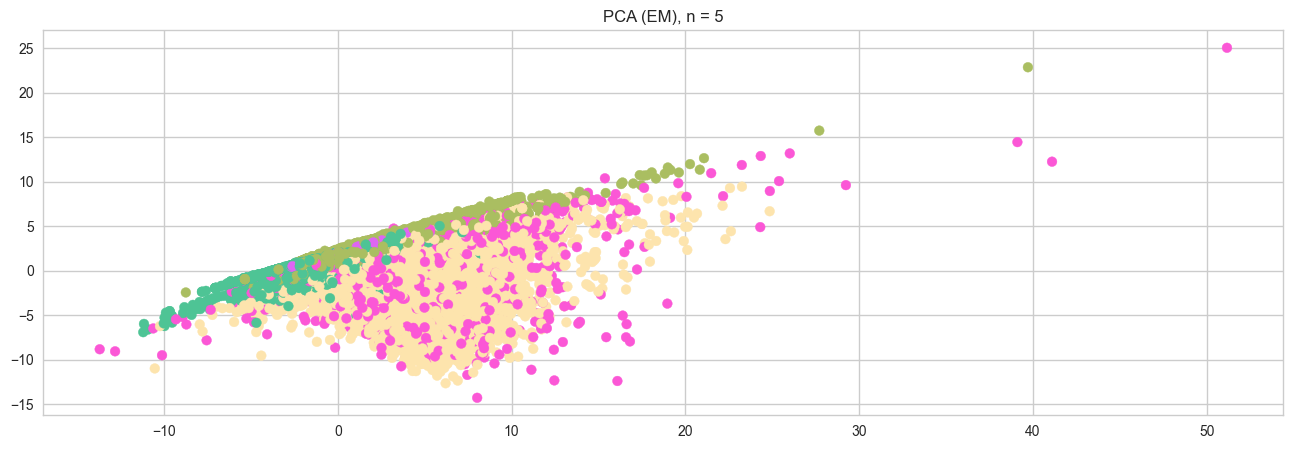

In [67]:
colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 5')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

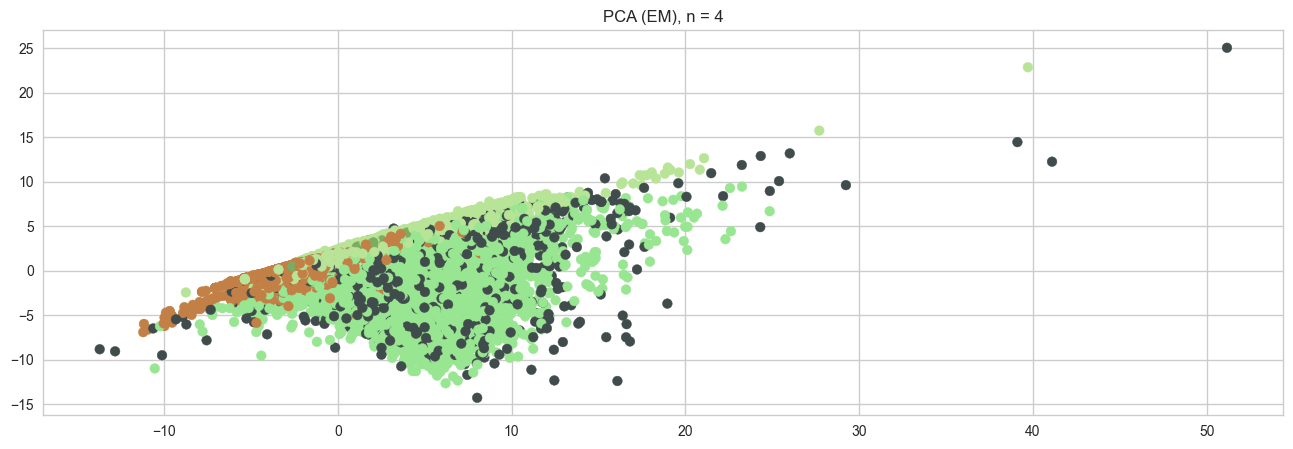

In [68]:
colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 4')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

## Silhouette Score

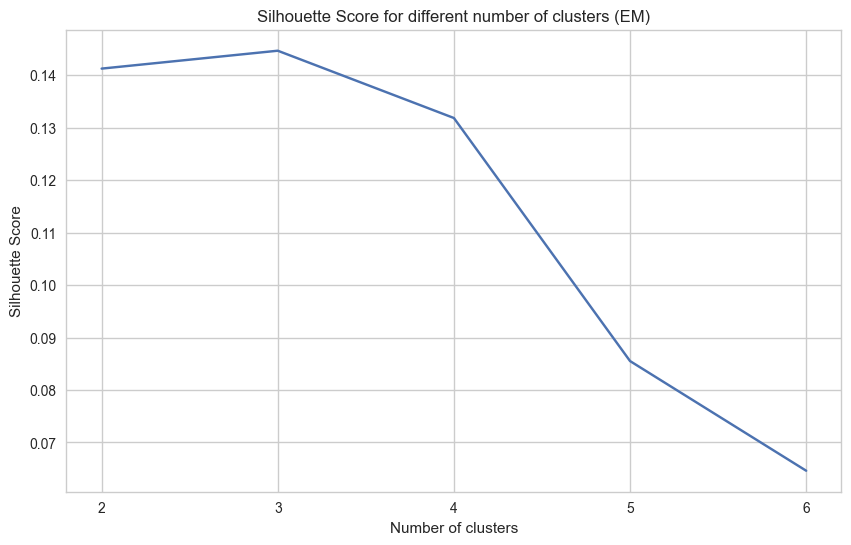

In [69]:
results_sil_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_em.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

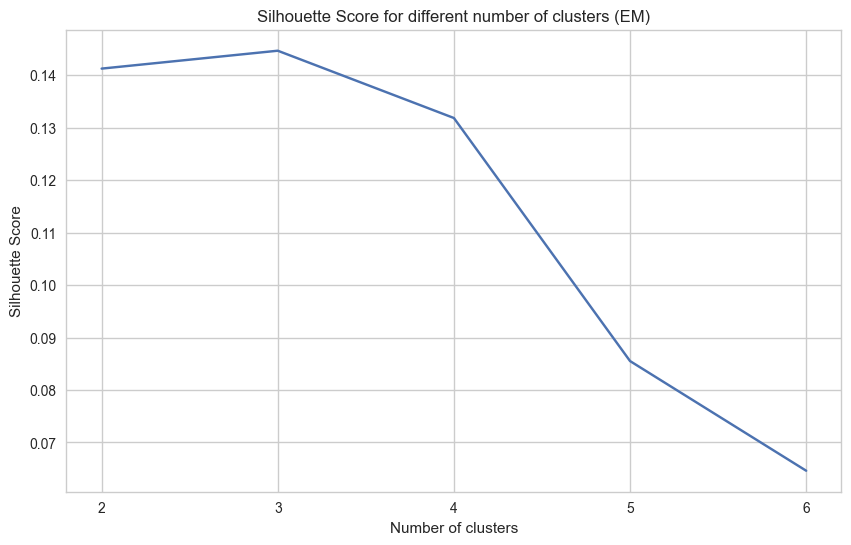

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

## Davies-Boulding Index

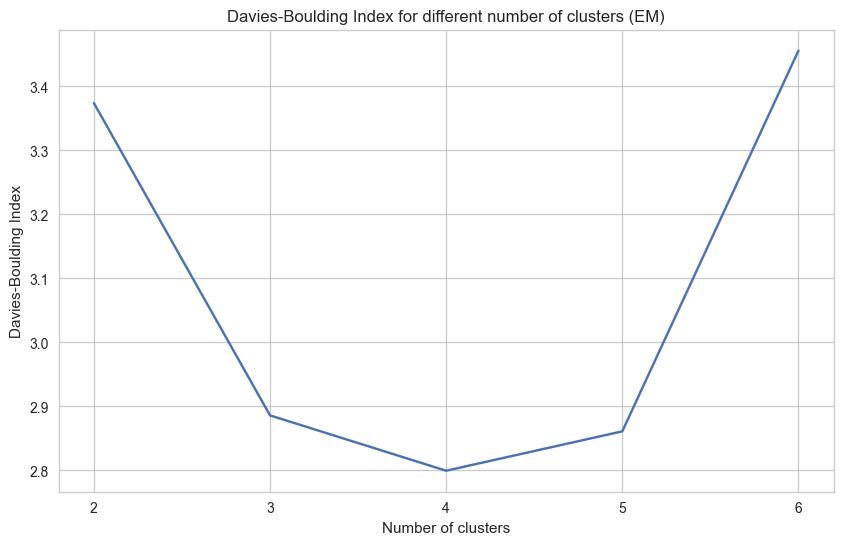

In [71]:
results_db_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_em.update({i: db_index})

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_em.keys()), list(results_db_em.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

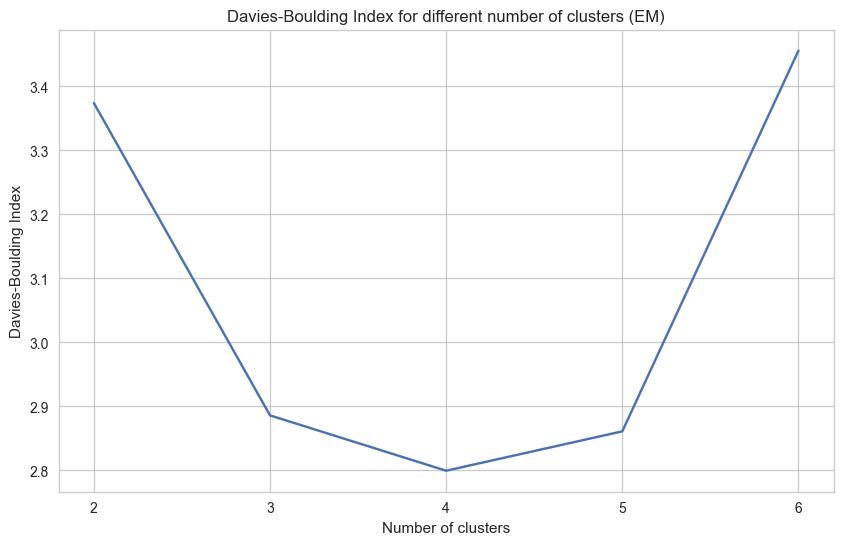

In [72]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_em.keys()), list(results_db_em.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

## Calinski-Harabasz Index

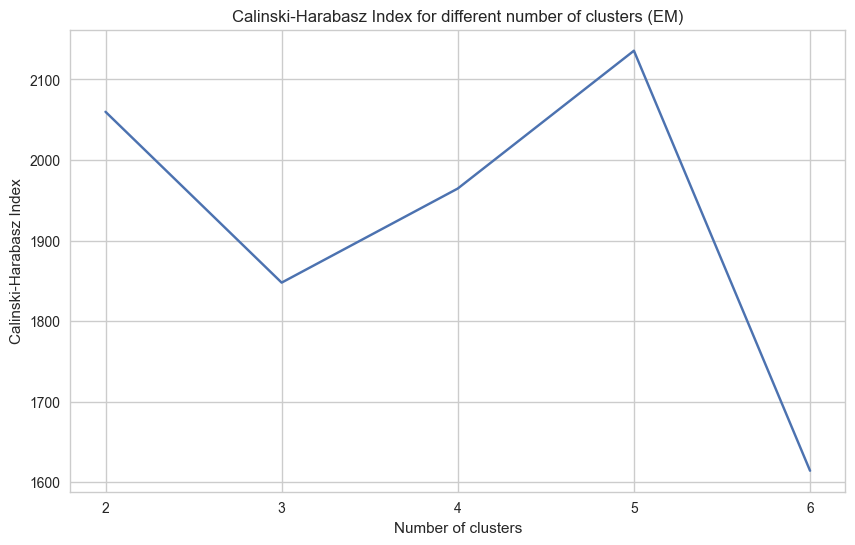

In [73]:
results_ch_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

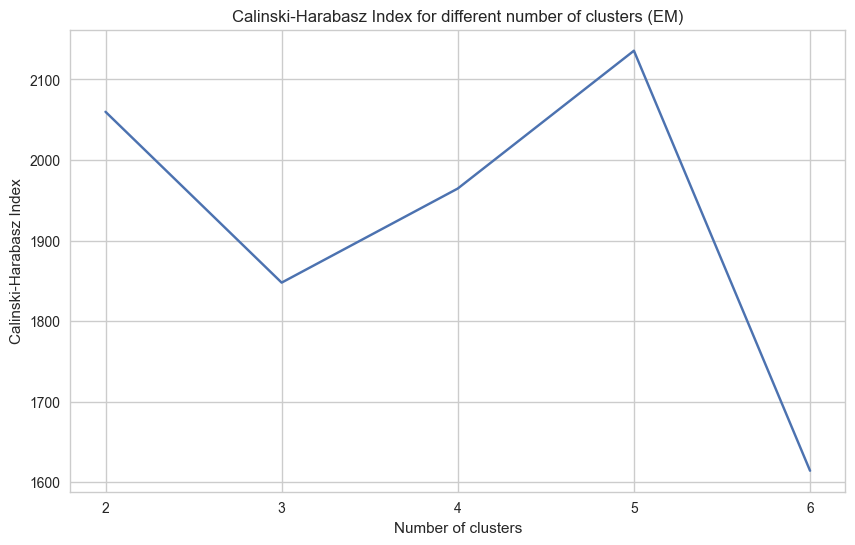

In [74]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [75]:
all_sil_arr = [[4, 0, results_sil_hc[4], results_sil_som[4], results_sil_em[4]],
            [5, 0, results_sil_hc[5], results_sil_som[5], results_sil_em[5]],
            [6, 0, results_sil_hc[6], results_sil_som[6], results_sil_em[6]]]

all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'K-means', 'Hierarchical clustering', 'Self-Organizing Maps',
                           'Expectation-Maximization Algorithm'],
                  index = [4, 5, 6])

In [76]:
all_sil_arr = [[4, 'K-means', 0],
               [5, 'K-means', 0],
               [6, 'K-means', 0],
               [4, 'Hierarchical clustering', results_sil_hc[4]],
               [5, 'Hierarchical clustering', results_sil_hc[5]],
               [6, 'Hierarchical clustering', results_sil_hc[6]],
               [4, 'Self-Organizing Maps', results_sil_som[4]],
               [5, 'Self-Organizing Maps', results_sil_som[5]], 
               [6, 'Self-Organizing Maps', results_sil_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_sil_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_sil_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_sil_em[6]]]
               
all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'Method', 'Value'])
                  #index = [4, 5, 6])

In [77]:
all_sil_metrics

,Cluster,Method,Value
0,4,K-means,0.000000
1,5,K-means,0.000000
2,6,K-means,0.000000
3,4,Hierarchical clustering,0.218616
4,5,Hierarchical clustering,0.117577
5,6,Hierarchical clustering,0.118795
6,4,Self-Organizing Maps,0.101731
7,5,Self-Organizing Maps,0.058984
8,6,Self-Organizing Maps,0.124370
9,4,Expectation-Maximization Algorithm,0.131858


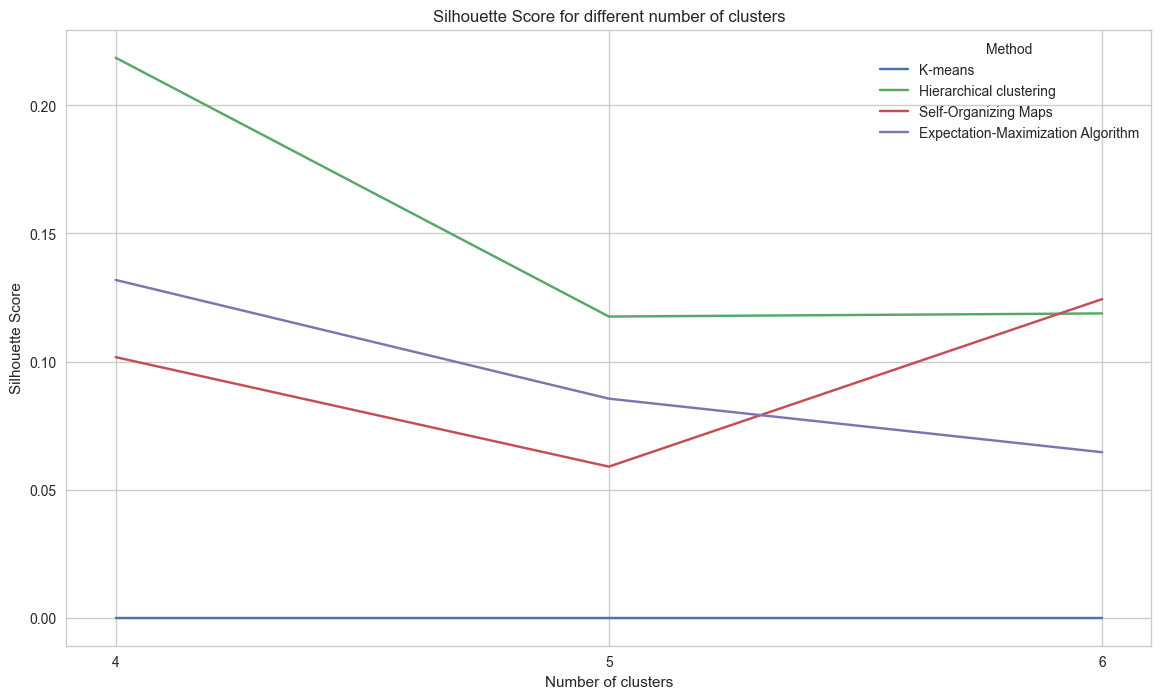

In [78]:
plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method');

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()

In [80]:
#print(results_sil_kmean)
#print(results_db_kmean)
#print(results_ch_kmean)

print(results_sil_hc)
print(results_db_hc)
print(results_ch_hc, '\n')

print(results_sil_som)
print(results_db_som)
print(results_ch_som, '\n')

print(results_sil_em)
print(results_db_em)
print(results_ch_em)

{4: 0.21861590261038175, 5: 0.11757738608021132, 6: 0.1187947095065304}
{4: 1.2020889582851702, 5: 1.3021806272132281, 6: 1.0929233053972993}
{4: 5613.027531228264, 5: 4871.312492145156, 6: 4471.713649221826} 

{2: 0.20250548874612595, 3: 0.09983509216753376, 4: 0.1017308239065023, 5: 0.05898353957758972, 6: 0.12436962678674664}
{2: 2.120892849754726, 3: 1.953385337525152, 4: 2.248367207305122, 5: 2.319603090958195, 6: 2.2234380577394752}
{2: 7565.737418800791, 3: 6141.2266020361085, 4: 5435.460771883695, 5: 4602.097042636838, 6: 4491.69933174364} 

{2: 0.14127658133011944, 3: 0.14468653477389865, 4: 0.13185806214345058, 5: 0.08551969098724949, 6: 0.06461112124843817}
{2: 3.374101579646688, 3: 2.885845977868867, 4: 2.7993738886678994, 5: 2.8609367017559113, 6: 3.4558544552285286}
{2: 2059.8144311236474, 3: 1847.697526528948, 4: 1964.5405601121404, 5: 2135.631879759523, 6: 1614.162340234672}


In [ ]:
# Kmeans
results_sil_kmean = {2: 0.32486442607513955, 3: 0.3211563611694346, 4: 0.292215885055288, 5: 0.1562934289688432, 6: 0.17426590989149876}
results_db_kmean = {2: 1.778838218281067, 3: 1.6803273884949868, 4: 1.3137080714802494, 5: 1.6571317545159527, 6: 1.7399194968504137}
results_ch_kmean = {2: 15978.971299854242, 3: 12508.713389131019, 4: 11819.29791846296, 5: 10647.800668869555, 6: 9786.965876715716}

# HC
results_sil_hc = {4: 0.24510319160023136, 5: 0.2359283154914985, 6: 0.16207892363447063}
results_db_hc = {4: 1.1660877308306414, 5: 1.2085875642541906, 6: 1.265109457990629}
results_ch_hc = {4: 8832.658128118814, 5: 9140.381557171988, 6: 8888.118081093648}

# SOM
results_sil_som = {2: 0.1980039691011599, 3: 0.10572190594041592, 4: 0.1041671038654041, 5: 0.13906348285537384, 6: 0.09643463980913455}
results_db_som = {2: 2.136408771637795, 3: 2.806943840812887, 4: 2.7610000529942913, 5: 2.3198074610102646, 6: 2.5079113050617567}
results_ch_som = {2: 13677.620420387746, 3: 10269.528222062387, 4: 8516.164232548015, 5: 8289.5284958362, 6: 6912.385391118864}

# EM
results_sil_em = {2: 0.07665755197305783, 3: 0.10826747329365503, 4: 0.07080321031914628, 5: 0.12683488840288956, 6: 0.11390447550750622}
results_db_em = {2: 3.027425153151228, 3: 3.834952761213184, 4: 3.214323969672477, 5: 3.6285811540843556, 6: 4.182988735085289}
results_ch_em = {2: 3818.2659028287676, 3: 3156.319023994064, 4: 3838.8431557554645, 5: 3538.948860100953, 6: 3449.1418901952925}

# Encoder + kmeans
results_sil_kmeans_enc = {2: 0.3556765161804125, 3: 0.3192944994714796, 4: 0.2272479613887269, 5: 0.19947129679121733, 6: 0.19031189118576233}
results_db_kmeans_enc = {2: 1.6037585358718083, 3: 1.8138472527827407, 4: 1.5000920892642415, 5: 1.9658720932575036, 6: 1.7556864240211878}
results_ch_kmeans_enc = {2: 2934.8548126067017, 3: 5096.247528779892, 4: 4366.449898445508, 5: 5437.122797505461, 6: 6140.148664081472}


## Encoder + K-means

In [81]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/1f/34/c93873c37f93154d982172755f7e504fdbae6c760499303a3111ce6ce327/torch-2.4.1-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/2f/95/f9310f35376024e1086c59cbb438d319fc9a4ef853289ce7c661539edbd4/filelock-3.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/c1/f9/6845bf8fca0eaf847da21c5d5bc6cd92797364662824a11d3f836423a1a5/sympy-1.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/1d/a0/6aaea0c2fbea2f89bfd5db25fb1e3481896a423002ebe4e55288907a97a3/fsspec-2024.9.0-py3-none-any.whl.m

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
from torch.utils.data import DataLoader

In [83]:
x_ = torch.tensor(X, dtype=torch.float32)

torch.manual_seed(96)
batch_size = 128
full_dataset = data.TensorDataset(x_, x_)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train, test = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [84]:
class encoder_decoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(35, 24),
            nn.BatchNorm1d(24),
            nn.LeakyReLU(),
            nn.Linear(24, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, 6),
        )
        self.decoder = nn.Sequential(
            nn.Linear(6, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, 24),
            nn.BatchNorm1d(24),
            nn.LeakyReLU(),
            nn.Linear(24, 35),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [85]:
model = encoder_decoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

In [88]:
print(x.shape)
y_pred = model(x)


torch.Size([128, 37])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x37 and 35x24)

In [86]:
epochs = 100

for i in range(epochs+1):
    sum_loss, total = 0, 0
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)

        sum_loss += loss.item()*y.shape[0]
        total += y.size(0)
            
        loss.backward()
        optimizer.step()
    l = sum_loss/total
    if i % 10 == 0:
        print(f'Epoch {i}, loss {l}')
    with torch.no_grad():
        total = 0
        model.eval()
        for x, y in test_loader:
            y_pred = model(x)

            predicted = torch.round(y_pred)
            total += y.size(0)
            loss = criterion(y_pred, y)
            sum_loss += loss.item()*y.shape[0]

        l = sum_loss/total
        if i % 10 == 0:
            print(f'Epoch {i}, val loss {l}')
            print()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x37 and 35x24)

In [ ]:
model = encoder_decoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=False)
epochs = 100

for i in range(epochs+1):
    sum_loss, total = 0, 0
    for x, y in full_loader:
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)

        sum_loss += loss.item()*y.shape[0]
        total += y.size(0)
            
        loss.backward()
        optimizer.step()
    l = sum_loss/total
    if i % 10 == 0:
        print(f'Epoch {i}, loss {l}')

In [ ]:
with torch.no_grad():
    model.eval()
    X_new = model.encoder(x_).numpy()

In [ ]:
X_new.shape

In [ ]:
# k means determine k
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X_new)
    distortions.append(sum(np.min(cdist(X_new, kmeanModel.cluster_centers_, 'euclidean'),
                                  axis=1)) / X_new.shape[0])

In [ ]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(3, 0, 1, label='slope change #1', color='red')
plt.axvline(4, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [ ]:
K = 5
kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X_new)
#kmeanModel = KMeans(n_clusters=K, random_state=30).fit(X_new)

In [ ]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

# plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on x_0, x_5')
# plt.scatter(X_new[:, 0], X_new[:, 1], c=c_arr);

# plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on x_3, x_5')
# plt.scatter(X_new[:, 3], X_new[:, 5], c=c_arr);

Y_pca = PCA(n_components=2).fit_transform(X);
plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on PCA')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

## Silhouette Score

In [ ]:
results_sil_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    sil_score = silhouette_score(X, labels)
    results_sil_kmeans_enc.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans_enc.keys()), list(results_sil_kmeans_enc.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (Encoder K-means)')
plt.show()

## Davies-Boulding Index

In [ ]:
results_db_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans_enc.update({i: db_index})

plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans_enc.keys()), list(results_db_kmeans_enc.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (Encoder K-means)')
plt.show()

## Calinski-Harabasz Index

In [ ]:
results_ch_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans_enc.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans_enc.keys()), list(results_ch_kmeans_enc.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (Encoder K-means)')
plt.show()

In [ ]:
print(results_sil_kmeans_enc)
print(results_db_kmeans_enc)
print(results_ch_kmeans_enc)

## Total graph

In [ ]:
# Kmeans
results_sil_kmeans = {2: 0.32486442607513955, 3: 0.3211563611694346, 4: 0.292215885055288, 5: 0.1562934289688432, 6: 0.17426590989149876}
results_db_kmeans = {2: 1.778838218281067, 3: 1.6803273884949868, 4: 1.3137080714802494, 5: 1.6571317545159527, 6: 1.7399194968504137}
results_ch_kmeans = {2: 15978.971299854242, 3: 12508.713389131019, 4: 11819.29791846296, 5: 10647.800668869555, 6: 9786.965876715716}

# HC
results_sil_hc = {4: 0.24510319160023136, 5: 0.2359283154914985, 6: 0.16207892363447063}
results_db_hc = {4: 1.1660877308306414, 5: 1.2085875642541906, 6: 1.265109457990629}
results_ch_hc = {4: 8832.658128118814, 5: 9140.381557171988, 6: 8888.118081093648}

# SOM
results_sil_som = {2: 0.1980039691011599, 3: 0.10572190594041592, 4: 0.1041671038654041, 5: 0.13906348285537384, 6: 0.09643463980913455}
results_db_som = {2: 2.136408771637795, 3: 2.806943840812887, 4: 2.7610000529942913, 5: 2.3198074610102646, 6: 2.5079113050617567}
results_ch_som = {2: 13677.620420387746, 3: 10269.528222062387, 4: 8516.164232548015, 5: 8289.5284958362, 6: 6912.385391118864}

# EM
results_sil_em = {2: 0.07665755197305783, 3: 0.10826747329365503, 4: 0.07080321031914628, 5: 0.12683488840288956, 6: 0.11390447550750622}
results_db_em = {2: 3.027425153151228, 3: 3.834952761213184, 4: 3.214323969672477, 5: 3.6285811540843556, 6: 4.182988735085289}
results_ch_em = {2: 3818.2659028287676, 3: 3156.319023994064, 4: 3838.8431557554645, 5: 3538.948860100953, 6: 3449.1418901952925}

# Encoder + kmeans
results_sil_kmeans_enc = {2: 0.3556765161804125, 3: 0.3192944994714796, 4: 0.2272479613887269, 5: 0.19947129679121733, 6: 0.19031189118576233}
results_db_kmeans_enc = {2: 1.6037585358718083, 3: 1.8138472527827407, 4: 1.5000920892642415, 5: 1.9658720932575036, 6: 1.7556864240211878}
results_ch_kmeans_enc = {2: 2934.8548126067017, 3: 5096.247528779892, 4: 4366.449898445508, 5: 5437.122797505461, 6: 6140.148664081472}


In [ ]:
# Silhouette Score
all_sil_arr = [[4, 'K-means', results_sil_kmeans[4]],
               [5, 'K-means', results_sil_kmeans[5]],
               [6, 'K-means', results_sil_kmeans[6]],
               [4, 'Hierarchical clustering', results_sil_hc[4]],
               [5, 'Hierarchical clustering', results_sil_hc[5]],
               [6, 'Hierarchical clustering', results_sil_hc[6]],
               [4, 'Self-Organizing Maps', results_sil_som[4]],
               [5, 'Self-Organizing Maps', results_sil_som[5]], 
               [6, 'Self-Organizing Maps', results_sil_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_sil_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_sil_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_sil_em[6]],
               [4, 'Encoder + K-means', results_sil_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_sil_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_sil_kmeans_enc[6]]]
               
all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'Method', 'Value'])

In [ ]:
# Davies-Boulding Index
all_db_arr = [[4, 'K-means', results_db_kmeans[4]],
               [5, 'K-means', results_db_kmeans[5]],
               [6, 'K-means', results_db_kmeans[6]],
               [4, 'Hierarchical clustering', results_db_hc[4]],
               [5, 'Hierarchical clustering', results_db_hc[5]],
               [6, 'Hierarchical clustering', results_db_hc[6]],
               [4, 'Self-Organizing Maps', results_db_som[4]],
               [5, 'Self-Organizing Maps', results_db_som[5]], 
               [6, 'Self-Organizing Maps', results_db_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_db_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_db_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_db_em[6]],
               [4, 'Encoder + K-means', results_db_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_db_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_db_kmeans_enc[6]]]
               
all_db_metrics = pd.DataFrame(all_db_arr,
                  columns = ['Cluster', 'Method', 'Value'])

In [ ]:
# Calinski-Harabasz Index
all_ch_arr = [[4, 'K-means', results_ch_kmeans[4]],
               [5, 'K-means', results_ch_kmeans[5]],
               [6, 'K-means', results_ch_kmeans[6]],
               [4, 'Hierarchical clustering', results_ch_hc[4]],
               [5, 'Hierarchical clustering', results_ch_hc[5]],
               [6, 'Hierarchical clustering', results_ch_hc[6]],
               [4, 'Self-Organizing Maps', results_ch_som[4]],
               [5, 'Self-Organizing Maps', results_ch_som[5]], 
               [6, 'Self-Organizing Maps', results_ch_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_ch_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_ch_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_ch_em[6]],
               [4, 'Encoder + K-means', results_ch_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_ch_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_ch_kmeans_enc[6]]]
               
all_ch_metrics = pd.DataFrame(all_ch_arr,
                  columns = ['Cluster', 'Method', 'Value'])

In [ ]:
plt.style.use('ggplot')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Silhouette Score', fontsize = 13)
plt.title('Silhouette Score for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

In [ ]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Silhouette Score', fontsize = 13)
plt.title('Silhouette Score for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

In [ ]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_db_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.yticks(np.arange(1, 6, step = 0.5))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Davies-Boulding Index', fontsize = 13)
plt.title('Davies-Boulding Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

In [ ]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_db_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.yticks(np.arange(1, 6, step = 0.5))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Davies-Boulding Index', fontsize = 13)
plt.title('Davies-Boulding Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

In [ ]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_ch_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Calinski-Harabasz Index', fontsize = 13)
plt.title('Calinski-Harabasz Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

In [ ]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_ch_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Calinski-Harabasz Index', fontsize = 13)
plt.title('Calinski-Harabasz Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

## DBSCAN

In [ ]:
import math

In [ ]:
%%time
X_sample = pd.DataFrame(X).sample(frac=0.04).values
eps, cluster_counts = [], []
for i in range(0,5):
    eps_p = 2.5 + 0.5*i
    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    eps.append(eps_p); cluster_counts.append(n_clusters_)
    print('{} / {}'.format(i+1, 5))

In [ ]:
#for i in range(0,5):
#    eps_p = 2.5 + 0.5*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 5))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

In [ ]:
#for i in range(0,9):
#    eps_p = 2.5 + 0.5*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 9))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

In [ ]:
#for i in range(0,9):
#    eps_p = 6.5 + 0.4*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 9))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
x_sample = np.random.choice(len(X), size=10000, replace=False)

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(PCA(n_components=10).fit_transform(X)[x_sample])

In [ ]:
K = 5
kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
sne_labels = kmeanModel.predict(X)[x_sample]

In [ ]:
tSNE = pd.DataFrame(np.vstack((tsne_results.T, sne_labels)).T, columns=['d1', 'd2', 'k'])

plt.figure(figsize=(16,7)); plt.title('t-SNE')
sns.scatterplot(x='d1', y='d2', hue='k', data=tSNE, legend='full', alpha=1.,
                palette=sns.color_palette('hls', kmeanModel.n_clusters));

## RFM

In [ ]:
#Recency — number of days since the last purchase
#Frequency — number of transactions made over a given period
#Monetary — amount spent over a given period of time

In [ ]:
#ds = pd.read_csv('for_tables_filtered_data_Выкупленные.csv')
ds = pd.read_csv('for_tables_filtered_data_Выкупленные.csv', sep=';')
#ds.set_index('Телефон_new', inplace=True)

In [ ]:
ds.columns

In [ ]:
ds = ds.sort_values(by='Дата', ascending=False).groupby('Телефон_new').head(1)
#ds['ДатаНов'] = pd.to_datetime(ds['Дата'], format='%d.%m.%y %H:%M')
ds['ДатаНов'] = pd.to_datetime(ds['Дата_дата'], format='%Y-%m-%d')

In [ ]:
most_recent = ds['ДатаНов'].max()

In [ ]:
# Recency
ds['Recency'] = most_recent - ds['ДатаНов']

In [ ]:
Recency = ds.set_index('Телефон_new')['Recency'].dropna()
Recency = Recency[Recency.index.isin(data.index)]
Recency

In [ ]:
data = pd.read_csv('vitrina_final.csv', sep=';')
data.set_index('Телефон_new', inplace=True)
data = data.dropna(subset = data.columns)